# <center> Calibration Reduction </center> #

For this notebook, we'll review the procedures for reducing your CCD image data, with the focus on processing your calibration images, biases, darks, flats, etc. You will need to have your data accessible on scorpius or wherever your running this jupyter notebook.

We'll focus on using the data from APO here, but you'll apply the general processes to your SBO data for Lab 3.

At APO we had planned on using DIS and not KOSMOS largely because KOSMOS is still in shared-risk availability, meaning the observatory is still hammering out the kinks of its use for science. More info can be found: https://www.apo.nmsu.edu/arc35m/Instruments/KOSMOS/userguide.html


In [1]:
#### Set up your paths and import packages #### then run this cell --- SHIFT+ENTER

import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as pyf
from astropy.stats import SigmaClip

import ASTR3520Tools as AT # make sure this file is in your working directory

%matplotlib notebook

#datafolder = ?? # "."  # replace this with the path to where you are keeping your APO data



## <center> Biases </center> ##

Let's start by examining the raw bias images. Some of you will be working with KOSMOS data and others with DIS, so pay attention to which instrument data you are working with and the differences between them.

<!-- Place your answers here -->

>Why do we need bias calibration frames?

><span style="color:#0066ff"> To subtract out the noise from the detector and see if there are any hot pixels that will affect our data taking. </span> 

**-In DS9, open up an example bias image for your instrument. For DIS that will be one for the blue CCD and one for the red CCD.**

<!-- Place your answers here -->

>Do you see any structure in your biases, describe? Is the bias level roughly the same everywhere? Between DIS Red and DIS Blue? What are the typical bias levels in ADU?

><span style="color:#0066ff"> Our bias image in DS9 appears to have two distinct regions. One region (the left half of the image) was distinctly darker than the right half. </span> 

Going forward in this notebook, we'll speak about a single CCD with calibration. Just remember that for DIS, that will mean you need to do everything twice, once for DIS Red and again for DIS Blue. KOSMOS will be a little different, and will require maybe looking up info that isn't yet in the standard header. More importantly for KOSMOS, the two halves of the detector use different amplifiers, giving different biases at different parts of the CCD --- you need to account for this structure when reducing the data.

For our APO datasets, the CCDs include what are known as *overscan* regions. These are regions of the CCD included in every exposure that are not exposed to light, but instead serve as a quick bias estimates inherent within each exposure. We ideally include bias calibrations whenever we observe, but the overscan can be a useful check. Because it's not part of the real data, we also usually trim these regions when reducing the raw data.


These sections should be noted in the header (use the user guide webpage for KOSMOS -- just above 'Dark Current'). 

<!-- Place your answers here -->

>What does the header information indicate for the data section of the CCD, and for the overscan region? Note DIS Red/Blue separately, as well as KOSMOS Left/Right --- each has its own overscan section. 

><span style="color:#0066ff"> ... </span> 

The above entries have two ranges, inclusive, x then y (on the CCD as displayed in DS9), and are assumed to start at index '1'. This is important because python assumes indices start at '0', exclude the end point of the range, and when indexing 2D arrays you list rows first (y) and then columns (x) --- be real careful about this, and check with us if you are unsure. Assuming 1x1 binning, for DIS the resulting data shape should be 1028 rows by 2048 columns. For KOSMOS (1x1) in total it would be 4096 rows by 1048 columns.


**-Load the Bias frame(s) into jupyter here using 'pyf', and compute the median bias level in the data section of the detectors as compared to the overscan regions (Red vs. Blue for DIS; Left vs. Right for KOSMOS).**

You use the indices expressed above to figure out how to index the 2D data array in python for the appropriate part of the CCD.


In [2]:
#### Open coding cell ### e.g., __ = pyf.open(datafolder+"/FILENAME"), and pull out the data array ___[0].data[??,??]  ## change this...

image = pyf.open("bias.0002.fits")
bias_l = image[0].data[0:4072,0:1023]
bias_r = image[0].data[0:4072,1024:2048]
overscan_l = image[0].data[0:4072,2048:2100]
overscan_r = image[0].data[0:4072,2100:2146]

print('Median of left data section: ' + str(np.median(bias_l)))
print('Median of right data section: ' + str(np.median(bias_r)))
print('Median of left overscan section: ' + str(np.median(overscan_l)))
print('Median of right overscan section: ' + str(np.median(overscan_r)))

Median of left data section: 3277.0
Median of right data section: 3282.0
Median of left overscan section: 3280.0
Median of right overscan section: 3287.0


<!-- Place your answers here -->

>How do the respective medians compare for data vs. overscan, and between DIS Red/Blue and KOSMOS Left/Right

><span style="color:#0066ff"> The left section has a slightly lower median </span> 

Now let's visualize how these biases behave. 

**-Use the code below to plot histograms of each of the data sections vs. its corresponding overscan bias.**



<IPython.core.display.Javascript object>


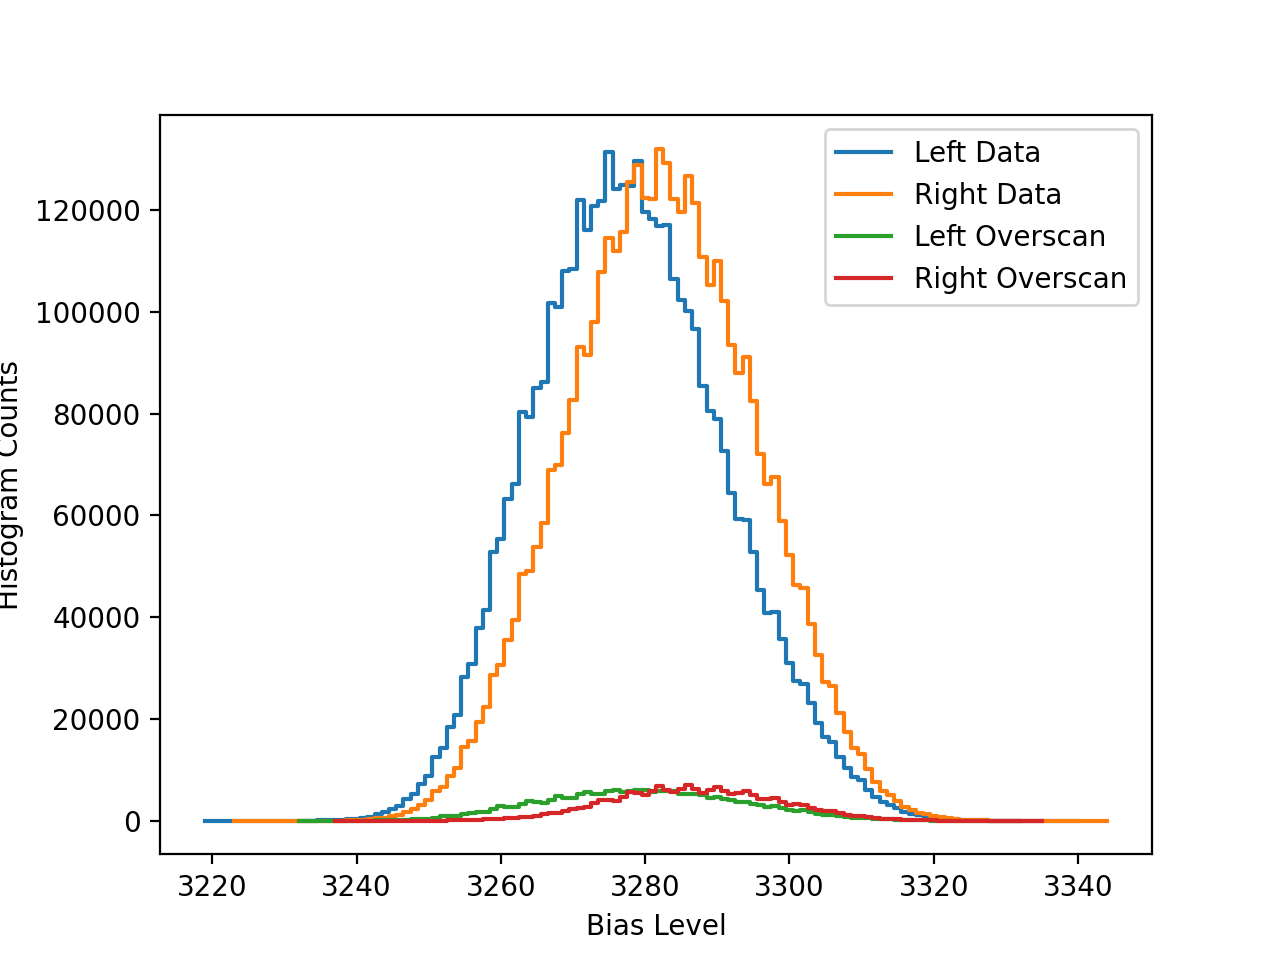

In [3]:
### Fill in the code below -----

filterout = SigmaClip(sigma=5)  # set up outlier rejection for hot pixels etc. 


#---


dat_1 = bias_l

datF_1 = filterout(dat_1) ## apply outlier filter
binsE_1 = np.arange(datF_1.min(),datF_1.max()+1) - 0.5  ## sets up histogram binning

outH_1 = np.histogram(datF_1.data[~datF_1.mask],bins=binsE_1)  ## uses numpy to create histrogram of all pixel counts in bias 2D array
xh_1 = outH_1[1][0:-1] + 0.5
yh_1 = outH_1[0]


###### Copy the above for each of the regions in question after running this cell once, and plot together, with separate labels
dat_2 = bias_r

datF_2 = filterout(dat_2) ## apply outlier filter
binsE_2 = np.arange(datF_2.min(),datF_2.max()+1) - 0.5  ## sets up histogram binning

outH_2 = np.histogram(datF_2.data[~datF_2.mask],bins=binsE_2)  ## uses numpy to create histrogram of all pixel counts in bias 2D array
xh_2 = outH_2[1][0:-1] + 0.5
yh_2 = outH_2[0]


dat_3 = overscan_l

datF_3 = filterout(dat_3) ## apply outlier filter
binsE_3 = np.arange(datF_3.min(),datF_3.max()+1) - 0.5  ## sets up histogram binning

outH_3 = np.histogram(datF_3.data[~datF_3.mask],bins=binsE_3)  ## uses numpy to create histrogram of all pixel counts in bias 2D array
xh_3 = outH_3[1][0:-1] + 0.5
yh_3 = outH_3[0]

dat_4 = overscan_r

datF_4 = filterout(dat_4) ## apply outlier filter
binsE_4 = np.arange(datF_4.min(),datF_4.max()+1) - 0.5  ## sets up histogram binning

outH_4 = np.histogram(datF_4.data[~datF_4.mask],bins=binsE_4)  ## uses numpy to create histrogram of all pixel counts in bias 2D array
xh_4 = outH_4[1][0:-1] + 0.5
yh_4 = outH_4[0]



#### Plotting  =------------------

figH, axH = plt.subplots()
axH.step(xh_1 ,yh_1,where='mid',label='Left Data')  ## FILL CODE HERE -- replace ?s 
axH.step(xh_2 ,yh_2,where='mid',label='Right Data')  ## FILL CODE HERE -- replace ?s 
axH.step(xh_3 ,yh_3,where='mid',label='Left Overscan') 
axH.step(xh_4 ,yh_4,where='mid',label='Right Overscan') 

axH.set_xlabel("Bias Level")
axH.set_ylabel("Histogram Counts")
axH.legend()




<!-- Place your answers here -->

>How does the implied width (what is the standard deviation?) of the above distributions compare to the quoted read noise for the CCDs? (Remember you need the gain to convert between e- counts and ADU)

><span style="color:#0066ff"> ... </span> 

The above examines an individual bias frame, and we can see the effect of the read noise in the widths of these distributions. To deal with this we usually take many bias frames and combine them to create what is known as the *master bias*. For the master bias, we take the data sections across multiple bias frames and median combine them, i.e., at each pixel location we take the median ADU level across the different frames.


**-Use the code below to create the master bias.**

In [4]:
##### Fill in code below ------


## This routine used below does several things:
# 1) It trims the overscan regions off, leaving just the data sections
# 2) It median combines them
# 3) It saves the master bias as a new fits file

# 4) It returns the 2D data array corresponding to the bias image

### -- fill in the code below 


## e.g., blist = [datafolder+"/file1","file2","file3", ... ]
blist = ["bias.0002.fits","bias.0003.fits","bias.0004.fits","bias.0005.fits","bias.0006.fits"] 

biasname = "MasterBias.fits"  ## do this independently for DIS Red and DIS Blue -- you need separate master biases for each CCD, with different saved files

biasM = AT.BiasCombine(blist,output=biasname,Trim=True,Silent=False)


## Note -- for SBO data, you set Trim=False 


BiasCombine: Combining 5 files --- 

bias.0002.fits
bias.0003.fits
bias.0004.fits
bias.0005.fits
bias.0006.fits
Saving and overwriting fits file as MasterBias.fits
Trimming for instrument kosmos
Trimming for instrument kosmos
Trimming for instrument kosmos
Trimming for instrument kosmos
Trimming for instrument kosmos



The routine BiasCombine is defined in the python code file we have prepared for the class. You can open that file 'ASTR3520Tools.py' to examine the code. Note the location of the new master bias image, it's stored in the working directory with the name given in the variable 'biasname'. The output of the routine is the also the 2D array of that image. 

**-Use the same code for plotting the histograms above to compare the count distribution in the MasterBias image to those of a singular bias image.**


<IPython.core.display.Javascript object>


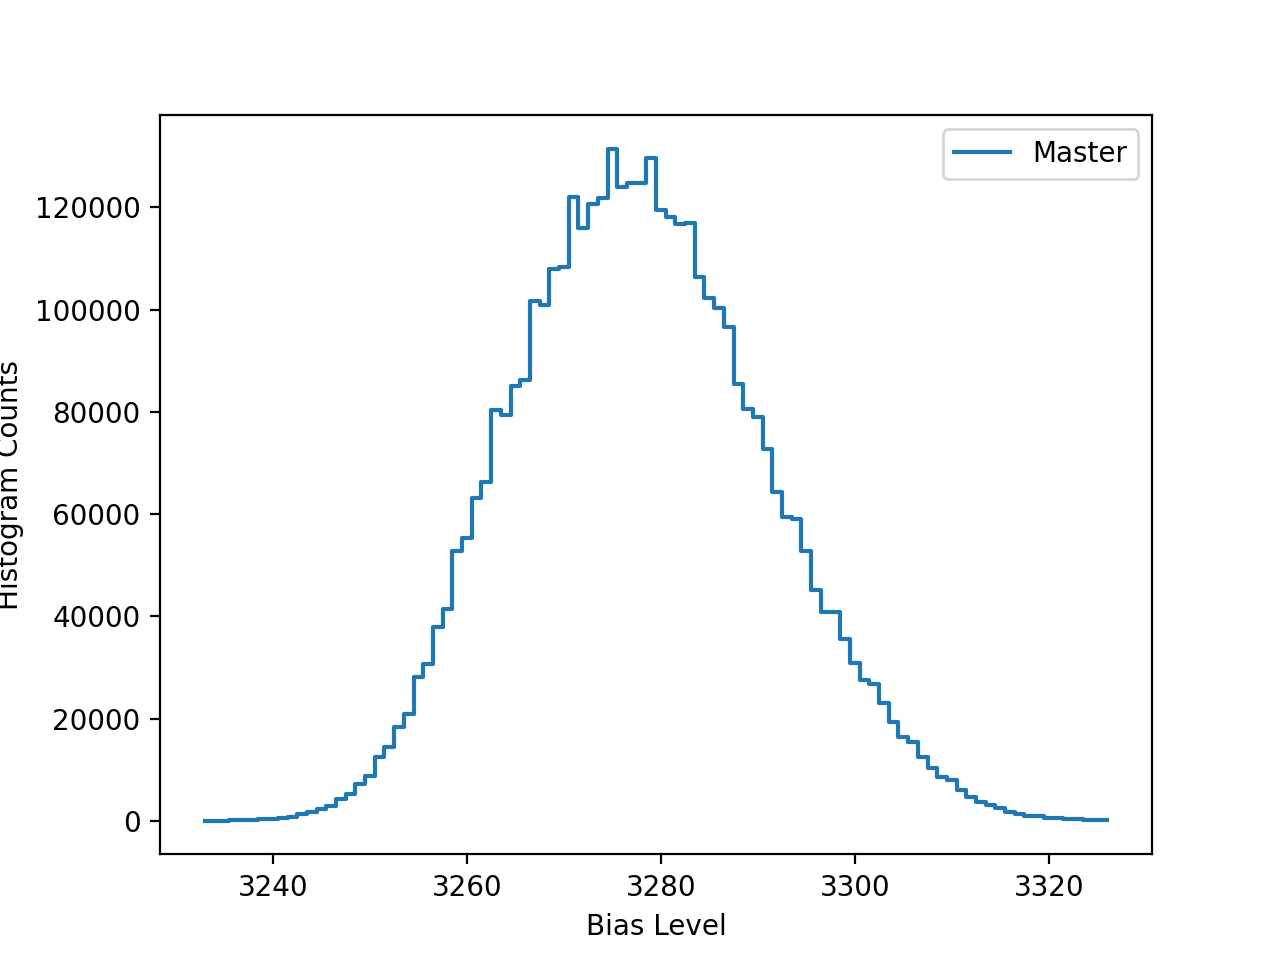

In [5]:
#### Open coding cell -------
filterout = SigmaClip(sigma=5)  # set up outlier rejection for hot pixels etc. 


#---


dat = biasM

datF = filterout(dat) ## apply outlier filter
binsE = np.arange(datF.min(),datF.max()+1) - 0.5  ## sets up histogram binning

outH = np.histogram(datF_1.data[~datF_1.mask],bins=binsE)  ## uses numpy to create histrogram of all pixel counts in bias 2D array
xh = outH[1][0:-1] + 0.5
yh = outH[0]


figH, axH = plt.subplots()
axH.step(xh ,yh,where='mid',label='Master')

axH.set_xlabel("Bias Level")
axH.set_ylabel("Histogram Counts")
axH.legend()




<!-- Place your answers here -->

>How does the standard deviation for the master bias compare to data sections of the individual bias image? For KOSMOS did you account for Left vs. Right?

><span style="color:#0066ff"> ... </span> 

By using many bias frames in the calibration step of creating the master bias image, you limit the impact of the read noise when subtracting the bias from the science images. 

The master bias image(s) created with 'BiasCombine' will be what you use to calibrate your APO data sets as part of your term projects.

For **Darks** you can process them the same way as the Bias frames (same code above), and apply them with a simple subtraction as long as they have the same exposure time as the science data. This will be important for calibrating your SBO data in Lab 3. If the times don't match exactly, there are other steps that we can take, but we'll have that discussion only if necessary.

## <center> Process Arcs </center> ##

The above gives you your Master Bias calibration image for applying to your data sets. Lets now process the arc images. 



<!-- Place your answers here -->

>For your CCD(s) what is the count rate in ADU at which the detector becomes non-linear? (check the instrument pages).

><span style="color:#0066ff"> ... </span> 

This level is not technically saturation, but you want to keep your detector counts well below this level, because linearity of the detector is what lets us count electrons on the CCD 1-to-1 as corresponding to astrophysical photons.

**-Use DS9 to check the arc images for your CCD(s), and make sure the peak count rates do not get into the non-linear regime.**

Although it's not a huge source of error, you can exclude very bright lines that are non-linear when determining the wavelength solution as we did before and as you've practiced for Lab 2. If we have multiple arc files, we can combine them (summed counts) to provide greater signal to the weaker lines and increase the number of lines we can use in determining the spectrograph wavelength solution. 

**-Compile a list of arc images for processing and use the code below to processes your arc files.**




In [6]:
##### Fill in code below ------

## This routine used below does several things:
# 1) Loads arc images, and trims overscan regions
# 2) Adds together the arc 2d images for better signal after subtracting bias 
# 3) saves file as new fits and returns 2D array


## e.g., blist = ["file1","file2","file3", ... ]
arclist = ["lamps.0033.fits","Lamps.0046.fits"]


arcname = "MasterArc.fits"  ## do this independently for DIS Red and DIS Blue (change names) -- you need separate master biases for each CCD, with different saved files

#be careful about these filenames as the default mode is to overwrite a file with the same name
# inputbias should point to the bias file we used before (make sure you use the proper ones for DIS red/blue)


arcM = AT.ArcCombine(arclist,inputbias="MasterBias.fits",output=arcname,Trim=True,Silent=False)


## Note -- for SBO data, you set Trim=False 




Using bias subtraction...
ArcCombine with bias subtraction: Summing 2 files --- 

lamps.0033.fits
Lamps.0046.fits
Saving and overwriting fits file as MasterArc.fits
Trimming for instrument kosmos
Trimming for instrument kosmos


The 'arcM' variable now holds the 2D array corresponding to the wavelength calibration image. It is also stored in the file noted by the variable 'arcname'.



<!-- Place your answers here -->

>For your instrument (KOSMOS or DIS) along which direction is the dispersion axis? Meaning, does the wavelength change with the columns or rows?

><span style="color:#0066ff"> ... </span> 

**-Pick three different positions along the *spatial* direction on the CCD, and plot corresponding slices of the arc spectrum, then compare.**

In [ ]:
### Open coding cell------

## e.g., plt.plot( x , y  )


In general we'll often see a spatial offset of the arc spectra, meaning that the lamp lines bend along the spatial direction. For our purposes we won't worry much about calibrating this. However, to do our best we need to use slices of the 2D arc spectra that correspond to the same position along the detector as our science targets. Thus, we need to have a look at our science images to determine where on the arc spectra to determine the wavelength solution (which slices to use). The processed and saved arc files will be the basis for defining the wavelength solutions for the APO data sets. 



## <center> Flats </center> ##

Now let's consider the flats. 

<!-- Place your answers here -->

>Why do we need flat field calibration frames?

><span style="color:#0066ff"> ... </span> 

**-Open up one of the appropriate APO flat field images in DS9 (separetly Red/Blue for DIS), then trace a projection along the wavelength axis.**

<!-- Place your answers here -->

>What are the peak count levels in ADU and how do they compare to the saturation limits? What are the minimum count levels in the illuminated part of the CCD, how do these compare to the maximum? 

><span style="color:#0066ff"> ... </span> 

What we are seeing is the spectrum of the flat field lamps. The idea is to use an even illumination source to correct for the interpixel sensitivity variations. Ideally we would get a high number of counts all along the detector to calibrate this aspect of the CCDs. If the counts are too low the flat fielding process would introduce additional uncertainty in our science images, and defeat part of the purpose of the calibrations. Taking many flat frames helps reduce that uncertainty, especially for the parts of the lamp spectra that aren't as bright. 






In [ ]:
##### Fill in code below ------

## This routine used below does several things:
# 1) Loads flat images, trims them and bias subtracts
# 2) it median combines the different flat frames normalizing for potential differences in exposure time
# 3) it fits a response curve to the average lamp spectrum 
# 4) uses the response curve to divide out the lamp spectrum from the flat field
# 5) writes out the file as a new fits image

# Note that the output includes an illumination mask, and a badpixel mask


## e.g., faltlist = ["file1","file2","file3", ... ]
flatlist =  ## FILL CODE IN HERE


flatname = "MasterFlat.fits"  ## do this independently for DIS Red and DIS Blue (change names) -- you need separate master biases for each CCD, with different saved files

#be careful about these filenames as the default mode is to overwrite a file with the same name
# inputbias should point to the bias file we used before (make sure you use the proper ones for DIS red/blue)



## --- Fill in SpAxis with 1 for columns as the spatial axis, and 0 for rows as the spatial axis --- KOSMOS and DIS are different


FlatM, illumindex , badpix = AT.FlatCombine(flatlist,biasname,output=flatname,SpAxis= ??? ,
                           Trim=True,Silent=True,Display=False,mode='poly')

## for KOSMOS use mode='spline' ; mode='poly' for DIS  ; try out each and compare with Display=True


## Note -- for SBO data, you set Trim=False 


The code if it ran successfully should have created a new fits file that represents the processed flat image. 

**-Open up the Master Flat file in DS9.**

<!-- Place your answers here -->

>What does the master flat file look like? What are the typical values? Do you see residual structure?

><span style="color:#0066ff"> ... </span> 

This is the Master Flat, and we divide the science frames by the flat image to normalize out the interpixel variations.

## <center> Science! </center> ##

This brings us to the last image calibration step. We have a master flat image, master bias image, and processed arc image. The arcs will be used for wavelength calibration, which you already have practice with. The next image processing step is to apply these calibrations to the science images. 

**-In the space below write code to apply the appropriate calibration steps to the science images.**


You'll need to do several things:

1) Load the science images and trim their overscan regions (use CCDTrim for this, it takes in the output of 'pyf.open')

2) Open the master bias 2D array and subtract it from the science 2D aray

3) Divide the result of the above by the master flat 2D array.

4) Apply the gain of the instrument to convert the units to electron counts


The result of this process is the calibrated science images --- from there you can begin your extractions, and the next steps toward science.

If you have time, also create a variance spectrum array: what is the uncertaitny on the calibrated science image? Remember that by taking many flats and bais frames, we've functionally eliminated the noise on those images, what's left?

For SBO data the only difference will be that instead of subtracting the master bias, you subtract the master dark from the science frames (with matched exposure times).

The additional useful thing, is to create a badpixel mask. This allows you to pre-identify where the bad columns and hot pixels are so you can ignore them in your science image processing. The master flat is a good image to identify them. The bad pixel mask will be a 2D array, the same size as the flat, but with just 0s and 1s. 1 at pixel coordinates to be masked, zeros otherwise. Talk to us, if you want to puruse this step.


In [ ]:
## Open Coding Cell -----------------------



